In [30]:
import numpy
!.\Scripts\activate
# !pip install tensorflow
!echo %VIRTUAL_ENV%
# !pip install torch
!pip install keras-core
# !pip install numpy
# !pip install matplotlib

C:\Users\Jasiek\Desktop\main\EDU\EDU sem7\rozpoznawanie_obraz�"��"'w\lab3-GAN


In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
# plt.rcParams['image.cmap'] = 'gray'
os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

Using PyTorch backend.


In [2]:
LOADING_MODEL = False

In [3]:
augumentor = keras.models.Sequential([
  keras.layers.RandomFlip("horizontal"),
  keras.layers.RandomRotation(0.07),
  keras.layers.RandomZoom((-0.15, 0)),
])

augumentor.compile()
augumentor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ random_rotation                 │ ?                         │          0 │
│ (RandomRotation)                │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ random_zoom (RandomZoom)        │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
IMG_SIZE = 64

In [5]:
if LOADING_MODEL == False:
    discriminator = keras.models.Sequential([
        keras.layers.Input((IMG_SIZE, IMG_SIZE, 3)),
        # augumentor,
        keras.layers.Conv2D(32, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(name="batchnorm1"),
        keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(name="batchnorm2"),
        keras.layers.Conv2D(64, (4, 4), strides = 2, padding='same',
                            kernel_regularizer=keras.regularizers.L2(0.01), bias_regularizer=keras.regularizers.L2(0.01)),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.BatchNormalization(name="batchnorm3"),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(1)
    ])

    discriminator.compile()
    discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)        │      1,568 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm1 (BatchNormalization) │ (None, 32, 32, 32)        │        128 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)        │     32,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm2 (BatchNormalization) │ (None, 16, 16, 64)        │        256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)          │     65,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batchnorm3 (BatchNormalization) │ (None, 8, 8, 64)          │        256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │      4,097 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 104,737 (409.13 KB)

 Trainable params: 104,417 (407.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [6]:
GEN_INPUT_SIZE = IMG_SIZE * 2

@keras.saving.register_keras_serializable()
def toRGB(x):
    return (x+1)/2

if LOADING_MODEL == False:
    generator = keras.models.Sequential([
        keras.layers.Input((GEN_INPUT_SIZE,)),
        keras.layers.Dense((IMG_SIZE//8)**2 * 64),
        keras.layers.Reshape((IMG_SIZE//8, IMG_SIZE//8, 64)),
        keras.layers.Conv2DTranspose(64, (4, 4), strides=2, padding="same",),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2DTranspose(128, (4, 4), strides=2, padding="same"),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2DTranspose(256, (4, 4), strides=2, padding="same"),
        keras.layers.LeakyReLU(negative_slope=0.2),
        keras.layers.Conv2D(3, (5, 5), padding="same", activation='tanh'),
        keras.layers.Lambda(toRGB),
    ])

    generator.compile()
    generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4096)              │    528,384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose                │ (None, 16, 16, 64)        │     65,600 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 128)       │    131,200 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 256)       │    524,544 │
│ (Conv2DTranspose)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 3)         │     19,203 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lambda (Lambda)                 │ (None, 64, 64, 3)         │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,268,931 (4.84 MB)

 Trainable params: 1,268,931 (4.84 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0.5196566 0.48376676
(1, 64, 64, 3)


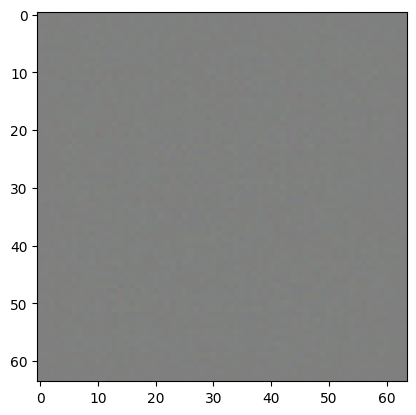

In [7]:
if LOADING_MODEL == False:
    random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
    # print(random_input)
    out = generator.predict(random_input)

    print(np.max(out), np.min(out))
    print(out.shape)
    # print(out[0])
    plt.imshow(out[0])
    plt.show()


In [9]:
import multiprocessing.pool
import tensorflow
import os
real_dataset = keras.utils.image_dataset_from_directory(
    "C:\\Users\\Jasiek\\Desktop\\main\\EDU\\EDU sem7\\crawled_cakes",
    labels=None,
    label_mode=None,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=None,
)



Found 1436 files belonging to 1 classes.


In [10]:
real_data = np.array(list(real_dataset))/255
# real_data.
# tensorflow.data.Dataset.as_numpy_iterator(
# )

(1436, 64, 64, 3)
[[[0.6784314  0.7127451  0.75      ]
  [0.69509804 0.72156864 0.7637255 ]
  [0.6509804  0.67941177 0.71568626]
  ...
  [0.09117647 0.33137256 0.0254902 ]
  [0.14019608 0.38627452 0.05490196]
  [0.11078431 0.37156862 0.0245098 ]]

 [[0.66862744 0.7        0.7392157 ]
  [0.7088235  0.7382353  0.7794118 ]
  [0.65588236 0.6862745  0.7205882 ]
  ...
  [0.08039216 0.30980393 0.03529412]
  [0.11372549 0.37156862 0.05098039]
  [0.11764706 0.3254902  0.05      ]]

 [[0.6784314  0.7058824  0.74509805]
  [0.65686274 0.6862745  0.7235294 ]
  [0.6784314  0.70686275 0.74313724]
  ...
  [0.05588235 0.29215688 0.02352941]
  [0.05196078 0.3        0.01666667]
  [0.05980392 0.23039216 0.04019608]]

 ...

 [[0.6627451  0.67745095 0.7107843 ]
  [0.6382353  0.65294117 0.6872549 ]
  [0.6578431  0.67058825 0.7019608 ]
  ...
  [0.48431373 0.5009804  0.53039217]
  [0.51862746 0.5352941  0.5745098 ]
  [0.54901963 0.56960785 0.6039216 ]]

 [[0.6372549  0.65294117 0.6852941 ]
  [0.6696078  0.681

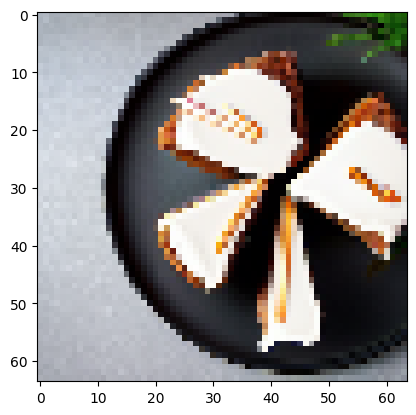

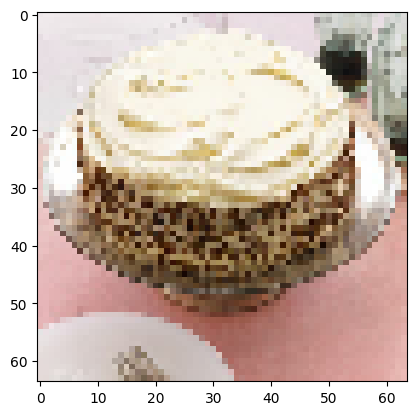

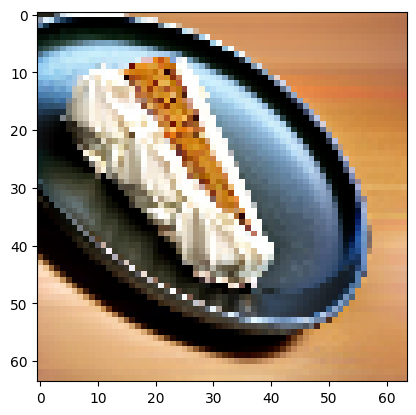

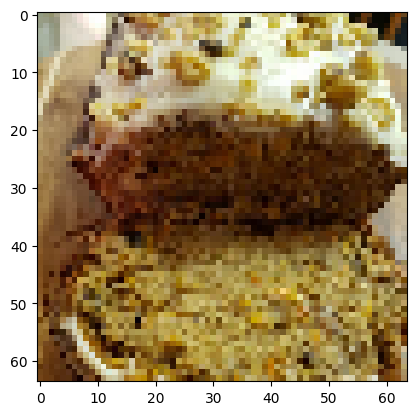

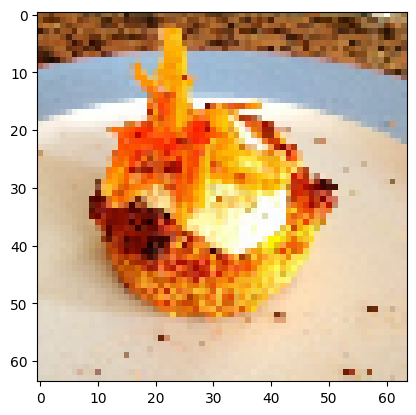

In [11]:
print(real_data.shape)
print(real_data[0])
for i in range(5):
    plt.imshow(real_data[i])
    plt.show()

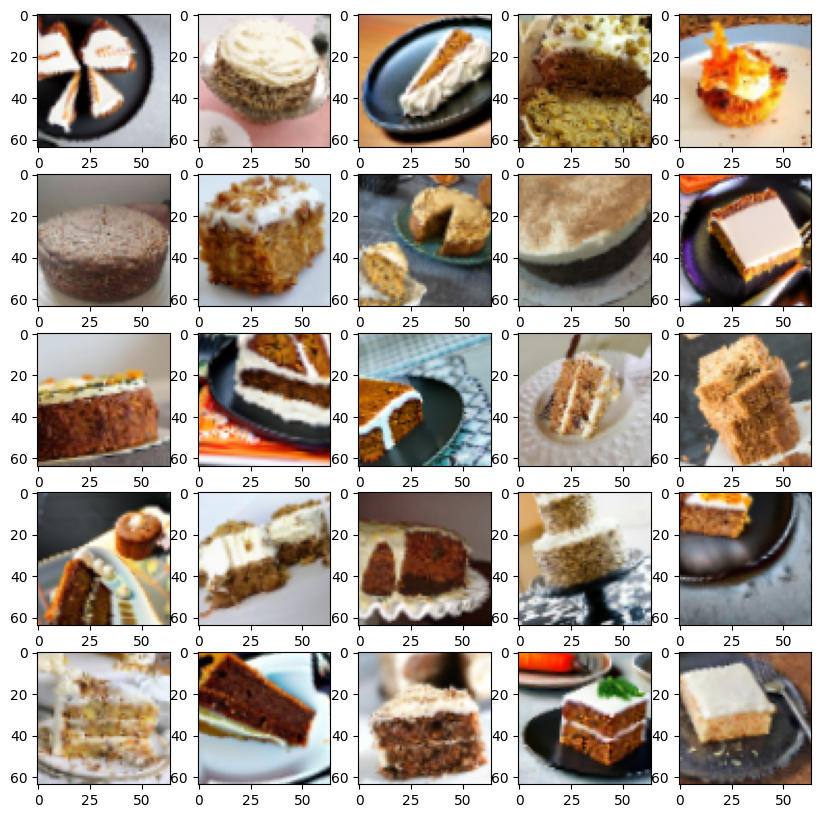

In [12]:
augumentor_tester = keras.models.Sequential([
    keras.layers.Input((IMG_SIZE, IMG_SIZE, 3)),
    augumentor,
])
augumentor_tester.compile()
augumented_example = augumentor_tester(real_data[:25])

imgs = augumented_example.cpu()
_, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img)
plt.show()

In [13]:
real_data = np.append(real_data, augumentor_tester(real_data).cpu(), axis=0)
real_data.shape

(2872, 64, 64, 3)


Note that layers (such that BatchNorm) do the learning in forward phase, so you have to set them to eval() too

In [14]:
import torch
BATCH_SIZE = 32

y_real_data = np.ones(len(real_data))

real_dataset = torch.utils.data.TensorDataset(
    torch.from_numpy(real_data), torch.from_numpy(y_real_data)
)

real_dataloader = torch.utils.data.DataLoader(
    real_dataset, batch_size=BATCH_SIZE//2, shuffle=True
)



In [15]:
def check_weights_change(org_dirscr_weights, org_gen_weights, discriminator_training: bool):
    if discriminator_training:
        print("discriminator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('WARNING the discriminator weights did not change')
        else:
            print("good, the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('good, the generator weights did not change')
        else:
            print("WARNING the generator weights layer changed")
    else:
        print("generator training")
        if False not in [(org_dirscr_weights[i] == discriminator.get_weights()[i]).all() for i in range(len(org_dirscr_weights))]:
            print('good, the discriminator weights did not change')
        else:
            print("WARNING the discriminator weights changed")
        if False not in [(org_gen_weights[i] == generator.get_weights()[i]).all() for i in range(len(org_gen_weights))]:
            print('WARNING the generator weights did not change')
        else:
            print("good, the generator weights layer changed")

In [23]:
 def wasserstein_loss(y_true, y_pred):
        return keras.ops.mean(y_true * y_pred)


if LOADING_MODEL == False:
    discriminator.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00005), loss=wasserstein_loss)
    generator.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00005), loss=wasserstein_loss)

In [24]:
validation_input = np.random.default_rng(seed = 420).normal(0, 1, (25, GEN_INPUT_SIZE))

In [33]:
from datetime import datetime

WEIGHT_CLIP_VAL = 0.01

def train_disciminator(real_inputs, real_targets, step):
    discriminator.get_layer("batchnorm1").trainable = True
    discriminator.get_layer("batchnorm2").trainable = True
    discriminator.get_layer("batchnorm3").trainable = True
    discriminator.compile(optimizer=discriminator.optimizer)
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    generated_inputs = generator(random_inputs)

    x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
    y_train = keras.ops.append(
        real_targets,
        -np.ones(len(generated_inputs)),
        axis=0)
    # sum_loss = 0
    # for x_train, y_train in ((real_inputs, real_targets - np.random.uniform(0, 0.05, real_targets.shape)),
    #                         (generated_inputs, np.random.uniform(0, 0.05, len(generated_inputs)))):
    outputs = discriminator(x_train)
    # print("dicr training d out: ", outputs)
    loss = discriminator.loss(y_train, outputs)
    if step == 0:
        print("discr training d out: ", outputs)

    discriminator.zero_grad()
    trainable_weights = [v for v in discriminator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        discriminator.optimizer.apply(gradients, trainable_weights)

        # sum_loss += loss
    for l in discriminator.layers:
        weights = l.get_weights()
        weights = [np.clip(w, -WEIGHT_CLIP_VAL, WEIGHT_CLIP_VAL) for w in weights]
        l.set_weights(weights)

    # return loss/2
    return loss

def train_generator(step):
    discriminator.get_layer("batchnorm1").trainable = False
    discriminator.get_layer("batchnorm2").trainable = False
    discriminator.get_layer("batchnorm3").trainable = False
    discriminator.compile(optimizer=discriminator.optimizer)
    random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
    x_gen_train = generator(random_inputs)
    y_gen_train = keras.ops.convert_to_tensor(np.ones(len(x_gen_train)))

    outputs = discriminator(x_gen_train)
    loss = generator.loss(y_gen_train, outputs)
    if step == 0:
        print("genr training d out: ", outputs)

    generator.zero_grad()
    trainable_weights = [v for v in generator.trainable_weights]

    loss.backward()
    gradients = [v.value.grad for v in trainable_weights]

    with torch.no_grad():
        generator.optimizer.apply(gradients, trainable_weights)

    return loss

In [34]:
# if LOADING_MODEL == False:
#     discriminator.optimizer.learning_rate.assign(0.00001/2)
#     discriminator.optimizer.learning_rate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0.5206679 0.480061
(1, 64, 64, 3)


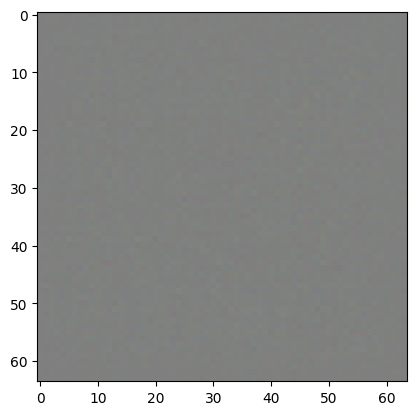

In [35]:
if LOADING_MODEL == True:
    generator = keras.saving.load_model("training\\models64\\generator64_120_07-11-2023_20-17-19.keras")
    discriminator = keras.saving.load_model("training\\models64\\discriminator64_120_07-11-2023_20-17-19.keras")
random_input = np.random.normal(0, 1, (1, GEN_INPUT_SIZE))
# print(random_input)
out = generator.predict(random_input)

print(np.max(out), np.min(out))
print(out.shape)
# print(out[0])
plt.imshow(out[0])
plt.show()

In [ ]:

CHECK_WEIGHTS = False

for epoch in range(1, 21):
    gen_losses = []
    discr_losses = []
    for step, (real_inputs, real_targets) in enumerate(real_dataloader):
        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            print(step)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        discr_losses.append(train_disciminator(real_inputs, real_targets, step).cpu().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, True)
            org_dirscr_weights = discriminator.get_weights()
            org_gen_weights = generator.get_weights()

        gen_losses.append(train_generator(step).cpu().detach().numpy())

        if CHECK_WEIGHTS and step < 2 and epoch == 1:
            check_weights_change(org_dirscr_weights, org_gen_weights, False)

    print(f"epoch {epoch}")
    print(f"Generator avg loss:     {np.mean(gen_losses)}")
    print(f"Discriminator avg loss: {np.mean(discr_losses)}")


    now = datetime.now()
    time = now.strftime('%d-%m-%Y_%H-%M-%S')
    if epoch%50 == 0:
        generator.save(f"training\\models64\\generator64w_{epoch}_{time}.keras")
        discriminator.save(f"training\\models64\\discriminator64w_{epoch}_{time}.keras")

    if epoch <= 20 or (epoch%20 == 0 and epoch <= 500) or epoch%50 == 0:
        imgs = generator.predict(validation_input)
        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()
        for img, ax in zip(imgs, axs):
            ax.imshow(img)
        plt.savefig(f"training\\results64\\imgs64w_{epoch}_{time}.png")
        plt.show()


discr training d out:  tensor([[0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007]], grad_fn=<AddBackward0>)
genr training d out:  tensor([[0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007],
        [0.0007]], grad_fn=<AddBackward0>)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


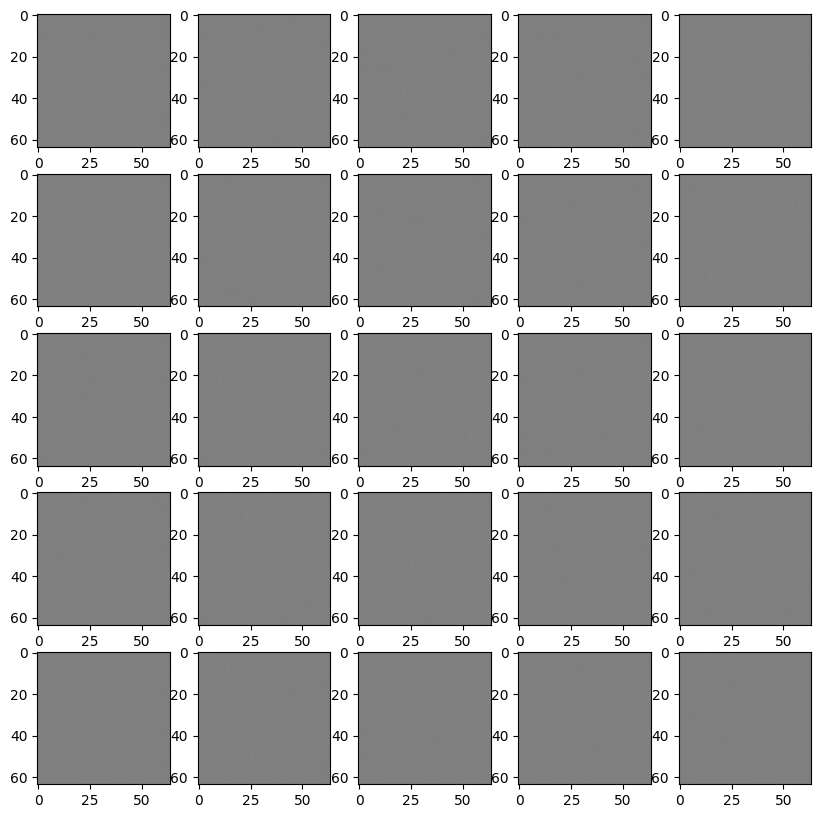

In [38]:
now = datetime.now()
time = now.strftime('%d-%m-%Y_%H-%M-%S')
if epoch%50 == 0:
    generator.save(f"training\\models64\\generator64w_{epoch}_{time}.keras")
    discriminator.save(f"training\\models64\\discriminator64w_{epoch}_{time}.keras")

if epoch <= 20 or (epoch%20 == 0 and epoch <= 500) or epoch%50 == 0:
    imgs = generator.predict(validation_input)
    _, axs = plt.subplots(5, 5, figsize=(10, 10))
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img)
    plt.savefig(f"training\\results64\\imgs64w_{epoch}_{time}.png")
    plt.show()

In [ ]:
# discriminator.get_layer("batch_normalization_3").trainable = False
# discriminator.get_layer("batch_normalization_4").trainable = False
# discriminator.get_layer("batch_normalization_5").trainable = False
# discriminator.compile()

In [ ]:
# random_inputs = np.random.normal(0, 1, (BATCH_SIZE//2, GEN_INPUT_SIZE))
# generated_inputs = generator(random_inputs)
#
# x_train = keras.ops.append(real_inputs, generated_inputs, axis = 0)
# # y_train = keras.ops.append(
# #     real_targets - np.random.uniform(0, 0.05, real_targets.shape),
# #     np.random.uniform(0, 0.05, len(generated_inputs)),
# #     axis=0)
# # y_train += np.random.uniform(-0.05, 0.05, y_train.shape)
# # random_ixing = np.random.permutation(len(x_train))
# # x_train = x_train[random_ixing]
# # y_train = y_train[random_ixing]
# outputs = discriminator(x_train)
#
# print("dicr training d out: ", outputs)
# # x_gen_train = generator(random_inputs)
# # y_gen_train = np.ones(len(x_gen_train))
#
# outputs = discriminator(generated_inputs)
# print("genr training d out: ", outputs)
#


In [ ]:
# real_inputs.shape